<a href="https://colab.research.google.com/github/SargisGasparyan/MyRpojectN1/blob/master/BelarusCarsPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Տվյալները կարդալու և մշակելու համար օգտագործված գրադարաններ***

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log,sqrt

# ***Տվյալների ներկայացում***




In [0]:
data=pd.read_csv(r'/content/drive/My Drive/cars.csv',encoding='latin')

In [0]:
data.shape

(56244, 12)

In [0]:
data.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment'],
      dtype='object')

In [0]:
data.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [0]:
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


# ***Տվյալների վիզուալացում***

In [0]:
# sns.pairplot(data)

In [0]:
# sns.scatterplot(x='year',y='priceUSD',data=data)

Այստեղից երևում է,որ ինչքան տարեթվերը բարձրանում է,այնքնան մեքենաների գները բարձրանում են

> Indented block



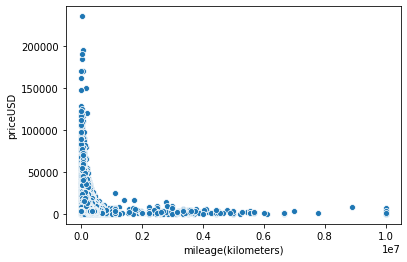

In [0]:
sns.scatterplot(x='mileage(kilometers)',y='priceUSD',data=data)

Այստեղից երևում է,որ ինչքան մեքենաների մաշվածությունը ցածր է,այնքնան գները բարձր են

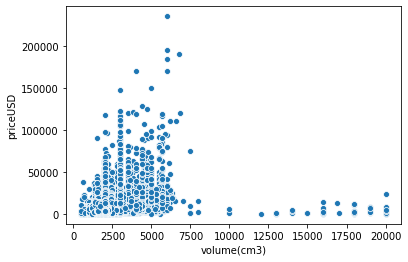

In [0]:
sns.scatterplot(x='volume(cm3)',y='priceUSD',data=data)

Այս գրաֆիկից երևում է,որ հիմնականում բարձր գներ ունեն այն մեքենաները որոնց շարժիչի ծավալը ավելի փոքր է

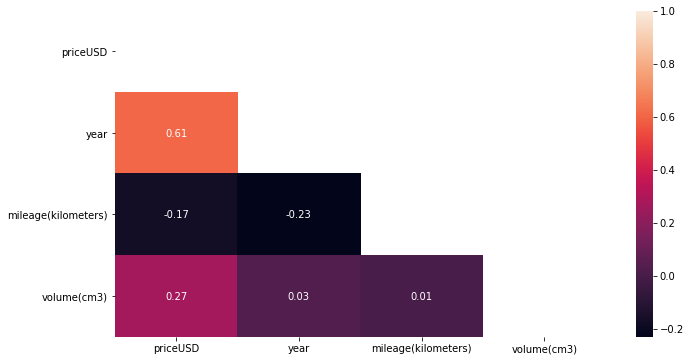

In [0]:
df=data[['priceUSD']+['year']+['mileage(kilometers)']+['volume(cm3)']]
plt.figure(figsize=(11,6))
mask = np.zeros_like(data.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)]=True
sns.heatmap(round(df.corr(),2),annot=True,mask=mask)

# ***Տվյալների մշակում***


 **NAN արժեքները ջնջված են տվյալների**

In [0]:
data=data.dropna()


 **OUTLIER արժեքները ջնջված են**



In [0]:

countmake=data.make.value_counts()
data.loc[data['make'].isin(countmake[countmake<3078].index), "make"]="Other"
data.make.value_counts()
met={'Other':0,'volkswagen':1,'audi':2,'bmw':3,'opel':4,'renault':5,'mercedes-benz':6,'ford':7}
data.make=data.make.map(met)

In [0]:
countmodel=data.model.value_counts()
data.loc[data['model'].isin(countmodel[countmodel<823].index), "model"]="Other"
data.model.value_counts()
met={'Other':0,'passat':1,'5-seriya':2,'a6':3,'golf':4,'astra':5,'e-klass':6,'3-seriya':7}
data.model=data.model.map(met)

In [0]:
data=data.loc[data.priceUSD<45000]

In [0]:
data=data.loc[data.year>1970]
countyear=data['year'].value_counts()
data.loc[data['year'].isin([1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003]), 'year'] = 'Other'
data.loc[data['year'].isin(countyear[countyear<=124].index), "year"]="Other"
data.loc[data['year'].isin([2004,2005,2006,2007,2008,2009]), 'year'] = 'Other1'
data.loc[data['year'].isin(countyear[countyear>=195].index), "year"]="Other2"
met={'Other':0,'Other1':1,'Other2':2}
data.year=data.year.map(met)

In [0]:
met={'with mileage':0,'with damage':1,'for parts':2}
data.condition=data.condition.map(met)

In [0]:
data=data.loc[data['mileage(kilometers)']<=450000]

In [0]:
met={'petrol':0,'diesel':1,'electrocar':2}
data.fuel_type=data.fuel_type.map(met)

In [0]:
data=data.loc[data['volume(cm3)']<5000]
data['volume(cm3)']=data['volume(cm3)'].map(lambda x:log(x))

In [0]:
countcolor=data['color'].value_counts()
data.loc[data['color'].isin(countcolor[countcolor<4994].index), "color"]="Other"
met={'Other':0,'black':1,'silver':2,'blue':3,'gray':4,'white':5}
data['color']=data['color'].map(met)

In [0]:

data['transmission']=[0 if i ==  'mechanics' else 1 for i in data['transmission']]
data['transmission'].value_counts()

0    29927
1    16566
Name: transmission, dtype: int64

In [0]:
met={'front-wheel drive':0,'rear drive':1,'all-wheel drive':2,'part-time four-wheel drive':3}
data.drive_unit=data.drive_unit.map(met)

In [0]:
met={'D':0,'C':1,'J':2,'M':3,'E':4,'B':5,'F':6,'S':7,'A':8}
data.segment=data.segment.map(met)


***Օգտվել եմ pandas.get_dummies մեթոդից և արժեքները բաժանել եմ 0 և 1_երի***



In [0]:
data['condition']=data['condition'].astype('str')
data['year']=data['year'].astype('str')
data['fuel_type']=data['fuel_type'].astype('str')
data['drive_unit']=data['drive_unit'].astype('str')
data['color']=data['color'].astype('str')
data['transmission']=data['transmission'].astype('str')
data['segment']=data['segment'].astype('str')
data['make']=data['make'].astype('str')
data['model']=data['model'].astype('str')

In [0]:
x=pd.get_dummies(data[['condition','year','color','segment','make','model','transmission','fuel_type','drive_unit']])

In [0]:
data = data.join(x)
data.drop(['condition', 'year', 'color','segment','make','model','transmission','fuel_type','drive_unit'], axis=1, inplace=True)

In [0]:
data=data.drop(columns=['year_nan'])

In [0]:
data['priceUSD'] = data['priceUSD'].map(lambda x: sqrt(x))

## **Տվյալների դասակարգում train և test բաժինների**

In [0]:
from sklearn.model_selection import cross_val_score,train_test_split

(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('priceUSD', axis=1),
                                            data['priceUSD'],
                                            test_size=0.3, 
                                            random_state=5)

# ***Random Forest Regression մոդելի ստեղծում***

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rfr = RandomForestRegressor(max_depth=None,n_estimators=85,min_samples_split=3)
rfr.fit(trainData,trainDependentVariables)
preds = rfr.predict(testData)

# ***Մոդելի գնահատում***

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [0]:
mse = mean_squared_error(y_pred=preds,
                         y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_pred=preds,
                          y_true=testDependentVariables)


R2 = r2_score(y_pred=preds, 
                      y_true=testDependentVariables)

R2_tr = r2_score(y_pred=rfr.predict(trainData), 
                      y_true=trainDependentVariables)
cv= cross_val_score(rfr,
                    data.drop('priceUSD', axis=1),
                    data['priceUSD'],
                    cv = 5).mean()

In [0]:
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nR2 train:    {}\nMAE:   {}\n5-fold cv {}"
.format(mse, rmse,R2,R2_tr,mae,cv))

MSE:   156.05099659105466
RMSE:  12.492037327476037
R2:    0.8700640847777306
R2 train:    0.9721511484624717
MAE:   9.356791897950766
5-fold cv 0.7796620291137102


# ***Լրացուցիչ մոդելների ստեղծում***

***Linear Regression***

In [0]:
from sklearn.linear_model import LinearRegression
regressionModel = LinearRegression()
regressionModel.fit(trainData, trainDependentVariables)
preds = regressionModel.predict(testData)
mse = mean_squared_error(y_pred=preds,
                         y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_pred=preds,
                          y_true=testDependentVariables)


R2 = r2_score(y_pred=preds, 
                      y_true=testDependentVariables)

R2_tr = r2_score(y_pred=regressionModel.predict(trainData), 
                      y_true=trainDependentVariables)
cv= cross_val_score(regressionModel,
                    data.drop('priceUSD', axis=1),
                    data['priceUSD'],
                    cv = 5).mean()
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nR2 train:    {}\nMAE:   {}\n5-fold cv {}"
.format(mse, rmse,R2,R2_tr,mae,cv))

***KNN Regressor***

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(trainData,trainDependentVariables)
preds = regressionModel.predict(testData)
mse = mean_squared_error(y_pred=preds,
                         y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_pred=preds,
                          y_true=testDependentVariables)


R2 = r2_score(y_pred=preds, 
                      y_true=testDependentVariables)

R2_tr = r2_score(y_pred=regressionModel.predict(trainData), 
                      y_true=trainDependentVariables)
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nR2 train:    {}\nMAE:"
.format(mse, rmse,R2,R2_tr,mae,cv))

MSE:   217.49055918505886
RMSE:  14.747561126676466
R2:    0.8189064121521047
R2 train:    0.8228638879094553
MAE:


# ***Model Diagnostics***

***Линейность***

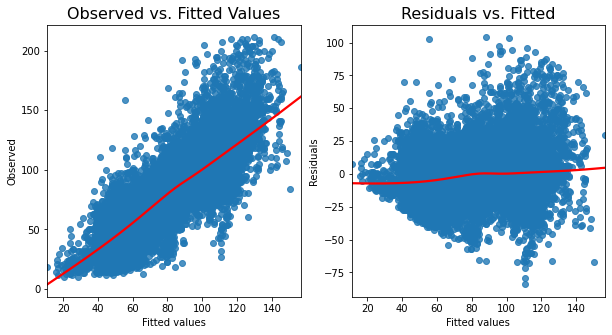

In [0]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
def linearity_test(model, y):  
    fitted_vals = model.predict(testData)
    resids = testDependentVariables-preds
    fig, ax = plt.subplots(1,2)
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Fitted Values', fontsize=16)
    ax[0].set(xlabel='Fitted values', ylabel='Observed')
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Fitted', fontsize=16)
    ax[1].set(xlabel='Fitted values', ylabel='Residuals')
linearity_test(regressionModel, testDependentVariables)

***Нормальность***

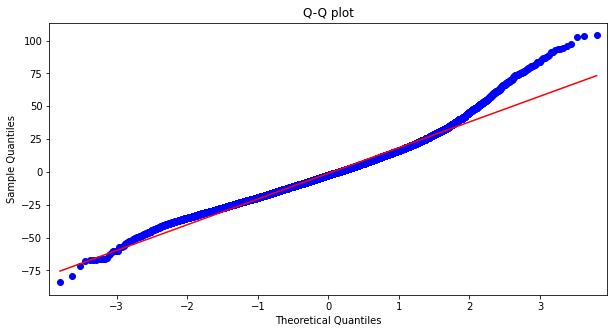

In [0]:
import pylab as py 
import statsmodels.api as sm 
sm.qqplot(testDependentVariables-preds,line='s') 
plt.title('Q-Q plot')
py.show()

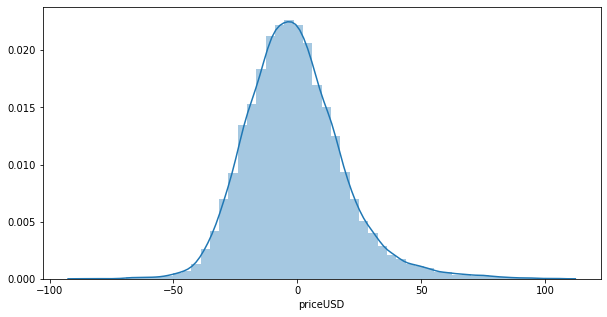

In [0]:
sns.distplot(testDependentVariables-preds)


***Гомоскедастичность***

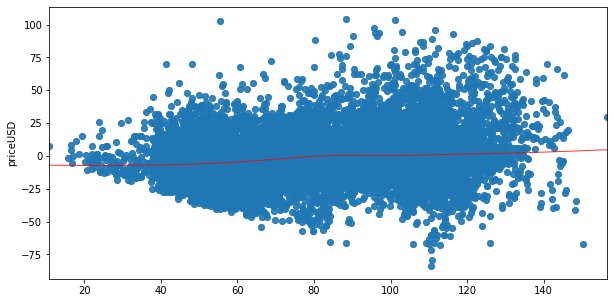

In [0]:
model_fitted_y=  preds 
model_norm_residuals=testDependentVariables-preds
plt.scatter(model_fitted_y, model_norm_residuals, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})



***Независимость***

Text(0, 0.5, 'Residuals')

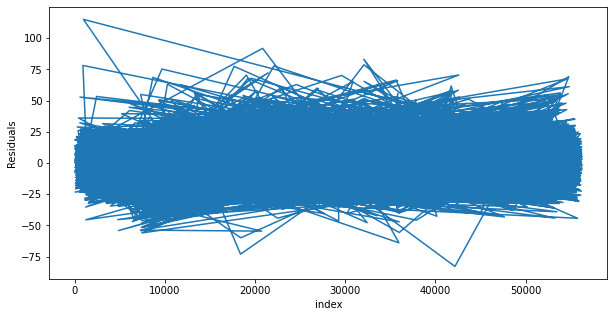

In [0]:
plt.plot(testDependentVariables-preds)
plt.xlabel('index')
plt.ylabel('Residuals')